In [10]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold, cross_val_score
from sklearn import decomposition, datasets
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import validation_curve
import seaborn as sns

## 7. Group Assignment & Presentation


### 1. Analysis: Frame the problem and look at the big picture
1. Problem: Predicting the price of a house

2. Objective: To develop a model that can predict the sale price of a house based on its characteristics, such as size, location, and number of bedrooms. This will help real estate agents to better understand the market and make more accurate pricing recommendations to their clients.

3. Framing: This problem can be framed as a supervised learning task, as we have a dataset of houses with their characteristics and sale prices, which can be used to train the model.

4. Performance Measurement: The performance of the model can be measured using metrics such as mean absolute error and mean squared error, which can help to evaluate how closely the predicted prices match the actual sale prices.

Overall, this project could help real estate agents to improve their pricing recommendations and make more informed decisions when buying or selling houses.

### 2. Get the data
1. This dataset was derived from the 1990 U.S. census, using one row per census block group. A block group is the smallest geographical unit for which the U.S. Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people).

An household is a group of people residing within a home. Since the average number of rooms and bedrooms in this dataset are provided per household, these columns may take surpinsingly large values for block groups with few households and many empty houses, such as vacation resorts.
2. Check the size and type of data (time series, geographical etc)

In [11]:
houses = fetch_california_housing()

df = pd.DataFrame(houses.data, columns=houses.feature_names)
# Get keys
print("Keys of california housing dataset: \n{}".format(houses.keys()))
# Target Names
print("Target names: {}".format(houses['target_names']))
# Feature Names
print("Feature names: \n{}".format(houses['feature_names']))
# Type of Data
print("Type of data: {}".format(type(houses['data'])))
# Shape of Data
print("Shape of data: {}".format(houses['data'].shape))
# First five colum
print("First five columns of data:\n{}".format(houses['data'][:5]))
# Type of target
print("Type of target: {}".format(type(houses['target'])))
# Shape of Target
print("Shape of target: {}".format(houses['target'].shape))
# Target
print("Target:\n{}".format(houses['target']))

#Add Value housing to the dataframe
col_names = houses.feature_names 
col_names.append('MedHouseVal')

#Define the dataframe
features = houses['data']
target = houses['target']
df = pd.DataFrame(data = np.c_[features, target], columns = col_names)

#Define median 
median = df['MedHouseVal'].median()

#Create new classifier column
df['classifier'] = np.where(df['MedHouseVal'] >= median, True, False)
df.head()


Keys of california housing dataset: 
dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])
Target names: ['MedHouseVal']
Feature names: 
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Type of data: <class 'numpy.ndarray'>
Shape of data: (20640, 8)
First five columns of data:
[[ 8.32520000e+00  4.10000000e+01  6.98412698e+00  1.02380952e+00
   3.22000000e+02  2.55555556e+00  3.78800000e+01 -1.22230000e+02]
 [ 8.30140000e+00  2.10000000e+01  6.23813708e+00  9.71880492e-01
   2.40100000e+03  2.10984183e+00  3.78600000e+01 -1.22220000e+02]
 [ 7.25740000e+00  5.20000000e+01  8.28813559e+00  1.07344633e+00
   4.96000000e+02  2.80225989e+00  3.78500000e+01 -1.22240000e+02]
 [ 5.64310000e+00  5.20000000e+01  5.81735160e+00  1.07305936e+00
   5.58000000e+02  2.54794521e+00  3.78500000e+01 -1.22250000e+02]
 [ 3.84620000e+00  5.20000000e+01  6.28185328e+00  1.08108108e+00
   5.65000000e+02  2.18146718e+00  3.78500000e+

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,classifier
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,True
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,True
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,True
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,True
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,True


### 3. Explore the data
 Presenting the data in tables and providing a thorough description and analysis of the dataset.

In [12]:
#3.1 Create a copy of the data for explorations
df_copy_explorations = df.copy()
#3.3 Study each feature and its characteristics:
print(houses.DESCR);
display(df_copy_explorations.head())
display(df_copy_explorations.describe())

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,classifier
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,True
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,True
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,True
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,True
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,True


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [13]:
#3.4 For supervised learning tasks, identify the target(s)
#The code then prints the target to the output, which should be an array of median house values for each of the samples in the dataset.

target = houses.target
print(target)


[4.526 3.585 3.521 ... 0.923 0.847 0.894]


Text(0, 0.5, 'y')

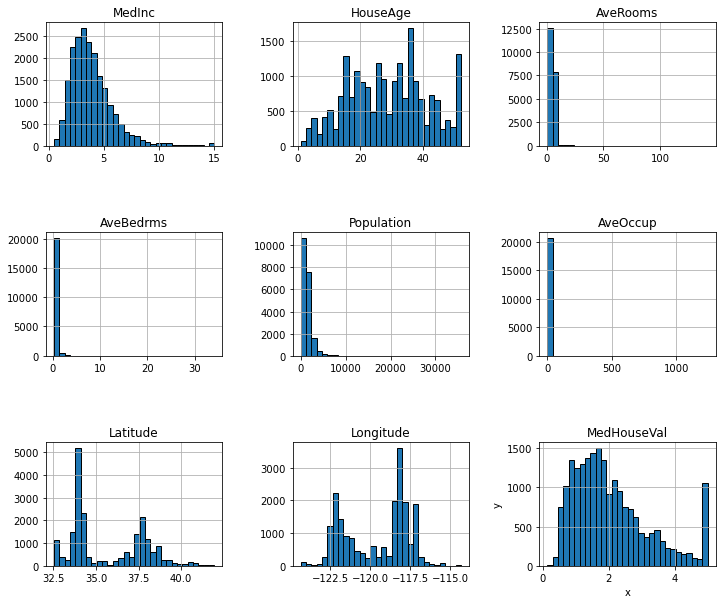

In [14]:
#3.5 Vizualize Data
# create a pandas DataFrame from the data

df.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)
plt.xlabel('x')
plt.ylabel('y')



In [15]:
#3.6 Correlations
# calculate the correlation matrix
corr = df.corr()

# print the correlation matrix
print(corr)

#3.7 Identify the promising transformations you may want to apply (e.g. convert skewed targets to normal via a log transformation)

train_data, test_data, train_target, test_target = train_test_split(df, target, test_size=0.2, random_state=69)


               MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
MedInc       1.000000 -0.119034  0.326895  -0.062040    0.004834  0.018766   
HouseAge    -0.119034  1.000000 -0.153277  -0.077747   -0.296244  0.013191   
AveRooms     0.326895 -0.153277  1.000000   0.847621   -0.072213 -0.004852   
AveBedrms   -0.062040 -0.077747  0.847621   1.000000   -0.066197 -0.006181   
Population   0.004834 -0.296244 -0.072213  -0.066197    1.000000  0.069863   
AveOccup     0.018766  0.013191 -0.004852  -0.006181    0.069863  1.000000   
Latitude    -0.079809  0.011173  0.106389   0.069721   -0.108785  0.002366   
Longitude   -0.015176 -0.108197 -0.027540   0.013344    0.099773  0.002476   
MedHouseVal  0.688075  0.105623  0.151948  -0.046701   -0.024650 -0.023737   
classifier   0.521922  0.069544  0.094075  -0.058107    0.000170 -0.024980   

             Latitude  Longitude  MedHouseVal  classifier  
MedInc      -0.079809  -0.015176     0.688075    0.521922  
HouseAge     0.011173

### 4. Prepare the data

(16512, 10)
(4128, 10)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 2578 to 4041
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       16512 non-null  float64
 1   HouseAge     16512 non-null  float64
 2   AveRooms     16512 non-null  float64
 3   AveBedrms    16512 non-null  float64
 4   Population   16512 non-null  float64
 5   AveOccup     16512 non-null  float64
 6   Latitude     16512 non-null  float64
 7   Longitude    16512 non-null  float64
 8   MedHouseVal  16512 non-null  float64
 9   classifier   16512 non-null  bool   
dtypes: bool(1), float64(9)
memory usage: 1.3 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 2578 to 4041
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       16512 non-null  float64
 1   HouseAge     16512 non-null  float64
 2   AveRooms     16512 non-null  

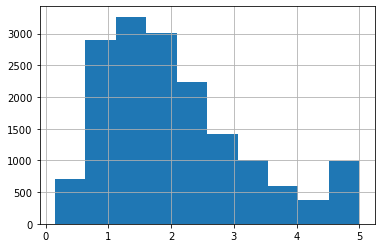

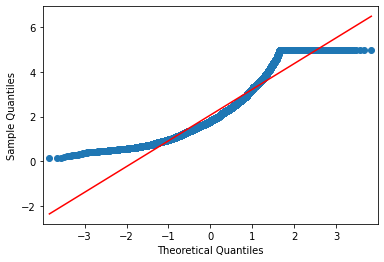

Statistics=1934.677, p=0.000
The null hypothesis can be rejected


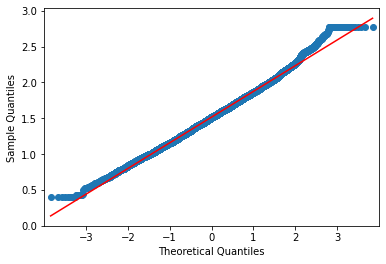

Statistics=167.009, p=0.000
The null hypothesis can be rejected


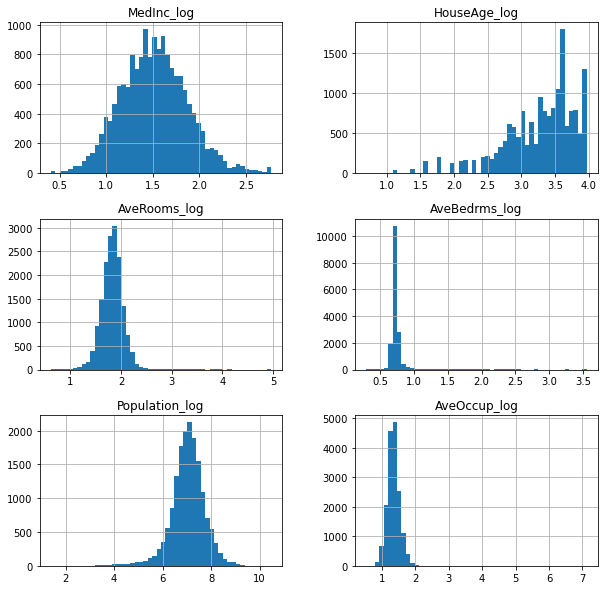

In [16]:

# Get copies of datasets
train_df = train_data.copy()
test_df = test_data.copy()

# Get shape of datasets
print(train_df.shape)
print(test_df.shape)

# Get information about the datasets
train_df.describe()
train_df.info()

# Get information about the datasets
train_df.describe()
train_df.info()

dummies = pd.get_dummies(pd.concat([train_df['Latitude'],test_df['Latitude']]),drop_first=True)
dummies_names=list(dummies.columns)

_features = list(train_df.columns)
_features.remove('Latitude')
_features.remove('Longitude')
print(_features)



# house is the value with most differences
train_df['MedHouseVal'].hist()

max_target=train_df['MedHouseVal'].max()
print("The largest median house value:",max_target)
print("The # of values, equal to the largest:", sum(train_df['MedHouseVal']==max_target))
print("The % of values, equal to the largest:", sum(train_df['MedHouseVal']==max_target)/train_df.shape[0])

# Get min target of median house

min_target=train_df['MedHouseVal'].min()
print("The smallest median house value:",min_target)
print("The # of values, equal to the smallest:", sum(train_df['MedHouseVal']==min_target))
print("The % of values, equal to the smallest:", sum(train_df['MedHouseVal']==min_target)/train_df.shape[0])

# Normality Tests
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

qqplot(train_df['MedHouseVal'], line='s')
pyplot.show()

from scipy.stats import normaltest

stat, p = normaltest(train_df['MedHouseVal'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

# Compare distribution of medInc

target_log=np.log1p(train_df['MedInc'])
qqplot(target_log, line='s')
pyplot.show()

# More test

stat, p = normaltest(target_log)
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")
    
train_df['MedHouseVal_log']=np.log1p(train_df['MedHouseVal'])
test_df['MedHouseVal_log']=np.log1p(test_df['MedHouseVal'])

   
skewed_features=["MedInc",'HouseAge','AveRooms', 'AveBedrms', 'Population','AveOccup']  
log_numerical_features=[]
for f in skewed_features:
    train_df[f + '_log']=np.log1p(train_df[f])  
    test_df[f + '_log']=np.log1p(test_df[f])
    log_numerical_features.append(f + '_log')


train_df[log_numerical_features].hist(bins=50, figsize=(10, 10))

# Scale features 
scaler = StandardScaler()

features_to_scale= _features + log_numerical_features
X_Train_scaled=pd.DataFrame(scaler.fit_transform(train_df[features_to_scale]),columns=features_to_scale, index=train_df.index)
X_Test_scaled = pd.DataFrame(scaler.fit_transform(test_df[features_to_scale]),columns=features_to_scale,index=test_df.index)

kf = KFold(n_splits=10, random_state=69, shuffle=True)


In [17]:
missing = df.isnull().sum()

# print the missing values
print(missing)
print(df.isnull())



MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
classifier     0
dtype: int64
       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0       False     False     False      False       False     False     False   
1       False     False     False      False       False     False     False   
2       False     False     False      False       False     False     False   
3       False     False     False      False       False     False     False   
4       False     False     False      False       False     False     False   
...       ...       ...       ...        ...         ...       ...       ...   
20635   False     False     False      False       False     False     False   
20636   False     False     False      False       False     False     False   
20637   False     False     False      False       False     False     False   
20638   False    

### 5. Short-list promising models
We expect you to do some additional research and train at **least one model per team member**.

1. Train mainly quick and dirty models from different categories (e.g. linear, SVM, Random Forests etc) using default parameters
2. Measure and compare their performance
3. Analyse the most significant variables for each algorithm
4. Analyse the types of errors the models make
5. Have a quick round of feature selection and engineering if necessary
6. Have one or two more quick iterations of the five previous steps
7. Short-list the top three to five most promising models, preferring models that make different types of errors




*   Linear Regression(Pawel)
*   Random Forest
*   Gradient Boosting



In [18]:
%%time

kf = KFold(n_splits=10, random_state=17, shuffle=True)

model=Ridge(alpha=1)
X = train_data
y = train_target
cv_scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error', n_jobs=-1)
print(np.sqrt(-cv_scores.mean()))


# Cross-validation
def cross_val_score_with_log(model=model, X=X,y=y,kf=kf, use_log=False):

      X_temp=np.array(X)

      # if use_log parameter is true we will predict log(y+1)
      if use_log:
          y_temp=np.log1p(y)
      else:
          y_temp=np.array(y)
      
      cv_scores=[]
      for train_index, test_index in kf.split(X_temp,y_temp):

          prediction = model.fit(X_temp[train_index], y_temp[train_index]).predict(X_temp[test_index])
          
          # if use_log parameter is true we should come back to the initial targer
          if use_log:
              prediction=np.expm1(prediction)
          cv_scores.append(-mean_squared_error(y[test_index],prediction))

      return np.sqrt(-np.mean(cv_scores))

cross_val_score_with_log(X=X,y=y,kf=kf, use_log=False)
cross_val_score_with_log(X=X,y=y,kf=kf, use_log=True)



# fit the model to the data
model.fit(train_data, train_target)
print("OLS\nTrain data: {} \nTest data: {}".format(model.score(train_data, train_target), model.score(test_data, test_target)))
print(model.coef_)

0.00011422244946360275
OLS
Train data: 0.9999999921546756 
Test data: 0.9999999921125464
[ 5.21775614e-05  1.40332533e-06 -1.58159790e-05  8.88971302e-05
 -5.63705885e-10 -4.35390301e-07 -3.14165711e-05 -3.25366013e-05
  9.99827721e-01  1.85645640e-04]
CPU times: total: 1.16 s
Wall time: 8.38 s


In [19]:
%%time
X = train_data
y = train_target

#StandardScaler is used to remove the outliners and scale the data by making the mean of the data 0
# and standard deviation as 1.
std_slc = StandardScaler()

#PCA which will reduce the dimension of features by 
# creating new features which have most of the varience of the original data
pca = decomposition.PCA()


# Decision Tree Regressor as Model to use GridSearchCV
dtreeReg = tree.DecisionTreeRegressor()

#Pipeline will help us by passing modules one by one through
# GridSearchCV for which we want to get the best parameters. 
# So we are making an object pipe to create a pipeline for all the 
# threee objects std_slc, pca, dtreeReg
pipe = Pipeline(steps=[("std_slc", std_slc),
                           ("pca", pca),
                           ("dtreeReg", dtreeReg)])

# Now we have to define the parameters that we want to optimise for these three objects.
# StandardScaler doesnot requires any parameters to be optimised by GridSearchCV.
# Principal Component Analysis requires a parameter "n_components" to be optimised.
# "n_components" signifies the number of components to keep after reducing the dimension
n_components = list(range(1,X.shape[1]+1,1))

# DecisionTreeClassifier requires two parameters "friedman_mse" and "mse" to be
# optimised by GridSearchCV. So we have set these two parameters as a list of 
# values form which GridSearchCV will select the best value of parameter.
criterion = ["friedman_mse", "mse"]
max_depth = [4,6,8,10]
    
# Create dict. to set all the parameter options for diff objects.
parameters = dict(pca__n_components=n_components,
                      dtreeReg__criterion=criterion,
                      dtreeReg__max_depth=max_depth)


# Making clf and fitting the dataset
clf = GridSearchCV(pipe, parameters)
clf.fit(X, y)

    
# Now we are using print statements to print the results. 
#It will give the values of hyperparameters as a result.

print("Best Number Of Components:", clf.best_estimator_.get_params()["pca__n_components"])
print(); print(clf.best_estimator_.get_params()["dtreeReg"])

CV_Result = cross_val_score(clf, X, y, cv=3, n_jobs=-1, scoring="r2")
print(); print(CV_Result)
print(); print(CV_Result.mean())
print(); print(CV_Result.std())

C:\Users\mmate\anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\mmate\anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\mmate\anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\mmate\anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\mmate\anaconda3\lib\site-packages\sklearn\tree\_classes.py:

C:\Users\mmate\anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\mmate\anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\mmate\anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\mmate\anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\mmate\anaconda3\lib\site-packages\sklearn\tree\_classes.py:

C:\Users\mmate\anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\mmate\anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\mmate\anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\mmate\anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\mmate\anaconda3\lib\site-packages\sklearn\tree\_classes.py:

C:\Users\mmate\anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\mmate\anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\mmate\anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\mmate\anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\mmate\anaconda3\lib\site-packages\sklearn\tree\_classes.py:

C:\Users\mmate\anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\mmate\anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\mmate\anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\mmate\anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\mmate\anaconda3\lib\site-packages\sklearn\tree\_classes.py:

C:\Users\mmate\anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\mmate\anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\mmate\anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\mmate\anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\mmate\anaconda3\lib\site-packages\sklearn\tree\_classes.py:

Best Number Of Components: 10

DecisionTreeRegressor(criterion='mse', max_depth=10)

[0.97600294 0.98532537 0.98661171]

0.9826466747759706

0.004727089810663484
CPU times: total: 2min 58s
Wall time: 51 s


In [20]:
%%time

X = train_data
y = train_target
kf = KFold(n_splits=10, random_state=69, shuffle=True)
X.columns

features_for_trees=['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude']    

X_trees=X[features_for_trees]

model_rf=RandomForestRegressor(n_estimators=100, random_state=69)
cv_scores = cross_val_score(model_rf, X_trees, y, cv=kf, scoring='neg_mean_squared_error', n_jobs=-1)


print(np.sqrt(-cv_scores.mean()))

0.5052639372855277
CPU times: total: 15.6 ms
Wall time: 11.8 s


In [21]:
param_grid={'n_estimators': [100],
            'max_depth':  [22, 23, 24, 25],
            'max_features': [5,6,7,8]}

gs=GridSearchCV(model_rf, param_grid, scoring='neg_mean_squared_error', n_jobs=-1, cv=kf, verbose=1)

gs.fit(X_trees,y)

print(np.sqrt(-gs.best_score_))

gs.best_params_

best_depth=gs.best_params_['max_depth']
best_features=gs.best_params_['max_features']

model_rf=RandomForestRegressor(n_estimators=100, max_depth=best_depth, max_features=best_features, random_state=17)
cv_scores = cross_val_score(model_rf, X_trees, y, cv=kf, scoring='neg_mean_squared_error', n_jobs=-1)

print(np.sqrt(-cv_scores.mean()))

Fitting 10 folds for each of 16 candidates, totalling 160 fits
0.49898418511840953
0.498731864819119


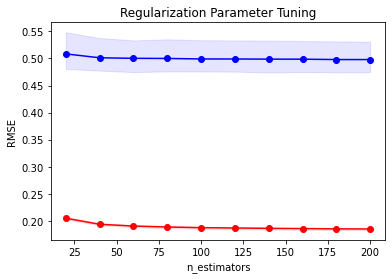

In [22]:

model_rf=RandomForestRegressor(n_estimators=200,  max_depth=best_depth, max_features=best_features, random_state=69)
Cs=list(range(20,201,20))
train_scores, valid_scores = validation_curve(model_rf, X_trees, y, param_name="n_estimators", 
                                              param_range=np.arange(20,201,20), cv=kf, scoring='neg_mean_squared_error')

plt.plot(Cs, np.sqrt(-train_scores.mean(axis=1)), 'ro-')

plt.fill_between(x=Cs, y1=np.sqrt(-train_scores.max(axis=1)), 
                 y2=np.sqrt(-train_scores.min(axis=1)), alpha=0.1, color = "red")


plt.plot(Cs, np.sqrt(-valid_scores.mean(axis=1)), 'bo-')

plt.fill_between(x=Cs, y1=np.sqrt(-valid_scores.max(axis=1)), 
                 y2=np.sqrt(-valid_scores.min(axis=1)), alpha=0.1, color = "blue")

plt.xlabel('n_estimators')
plt.ylabel('RMSE')
plt.title('Regularization Parameter Tuning')

plt.show()


Linear regression is fast, simple and can provide quite a good baseline result for our task. Tree based models can provide better results in case of nonlinear complex dependences of variables and in case of small number of variables, they are also more stable to multicollinearity (and we have highly correlated variables). Moreover in our problem target values are clipped and targets can't be outside the clipping interval, it is good for the tree-based models.

The results of using these models will be compared in the 11-12 parts of the project. Tree-based models are expected to work better in this particular problem, but we will start with more simple model.



#### Sources of information : 
- https://www.projectpro.io/recipes/create-and-optimize-baseline-decision-tree-model-for-regression
- https://www.kaggle.com/code/ilialar/california-housing-analysis-and-preciction